# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## **План проведения анализа надежности заемщиков**   
1. Откроем таблицу и изучим общую информацию о данных  


2. Осуществим предобработку данных  
   - определим и заполним пропущенные значения  
   - выберем метод для изменения типа данных  
   - удалим дубликаты  
   - выделим леммы в значениях столбца с целями получения кредита  
   - категоризируем данные  


3. Ответим на вопросы  
   - Есть ли зависимость между наличием детей и возвратом кредита в срок?  
   - Есть ли зависимость между семейным положением и возвратом кредита в срок?  
   - Есть ли зависимость между уровнем дохода и возвратом кредита в срок?  
   - Как разные цели кредита влияют на его возврат в срок?  


4. Сформулируем общий вывод  

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/data.csv')
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Посмотрим на общую информацию о таблице, наименовании столбцов, их типах данных и размере

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Описание данных**  
* children — количество детей в семье  
* days_employed — общий трудовой стаж в днях  
* dob_years — возраст клиента в годах  
* education — уровень образования клиента  
* education_id — идентификатор уровня образования  
* family_status — семейное положение  
* family_status_id — идентификатор семейного положения  
* gender — пол клиента  
* income_type — тип занятости  
* debt — имел ли задолженность по возврату кредитов  
* total_income — ежемесячный доход  
* purpose — цель получения кредита  

Познакомимся со столбцами таблицы поближе:

В столбцах 'days_employed' и 'total_income' обнаружены пропуски 

In [4]:
len(data['days_employed'].unique())

19352

В столбце 'days_employed' есть пропуски, отрицательные данные и нецелочисленные значения

In [5]:
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

В столбце 'children' ошибки: 47 значений: -1 и 76 значений: 20

In [6]:
data['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75])

In [7]:
data[data['dob_years'] == 0]['dob_years'].count()

101

В столбце 'dob_years' 101 ноль, т.е. возраст заемщика - новорожденный

In [8]:
data['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

В столбце 'education' у данных разные регистры

In [9]:
data['education_id'].value_counts()

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

С данными все хорошо

In [10]:
data['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

С данными все хорошо, только подправить регистр в данных "Не женат..." 

In [11]:
data['family_status_id'].value_counts()

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

С данными все хорошо

In [12]:
data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

Одна ошибка в столбце 'gender'

In [13]:
data['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
в декрете              1
студент                1
Name: income_type, dtype: int64

С данными все хорошо

In [14]:
data['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

С данными все хорошо

In [15]:
len(data['total_income'].unique())

19352

В столбце 'total_income' пропуски, длинная дробь

In [16]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

В столбце 'purpose' много неявных дубликатов

### Вывод

Для анализа данных о потенциальных заемщиках надо вначале улучшить качество информации в полученном файле.   
В столбце 'children' обнаружены две ошибки: 47 ячеек по -1 ребенку в семье и 76 ячеек по 20 детей.  
В столбце 'days_employed' пропуски, нецелочисленные и отрицательные числа.  
В столбце 'dob_years' 101 значение равно 0, т.е. 101 новорожденный заемщик.  
В столбце 'education' разные регистры слов.  
В столбце 'gender' одна ошибка(XNA).  
В столбце 'total_income' пропуски, числа с длинной дробью. Количество пропусков совпадает с пропусками в таблице 'days_employed' - предположим, что это означает отсутствие заполненного дохода у тех, у кого не указан стаж.  
В столбце 'purpose' много неявных дубликатов.    

### Шаг 2. Предобработка данных

### Обработка пропусков

In [17]:
data[data['total_income'].isna()].count()

children            2174
days_employed          0
dob_years           2174
education           2174
education_id        2174
family_status       2174
family_status_id    2174
gender              2174
income_type         2174
debt                2174
total_income           0
purpose             2174
dtype: int64

Количество пропусков в столбцах 'days_employed' и 'total_income' совпадает: 2174

In [18]:
data[data['total_income'].isna()].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


Найдем среднее значение дохода в каждой группе профессий

In [19]:
income_total_mean = data.groupby('income_type')['total_income'].mean()
income_total_mean

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        170898.309923
компаньон          202417.461462
пенсионер          137127.465690
предприниматель    499163.144947
сотрудник          161380.260488
студент             98201.625314
Name: total_income, dtype: float64

In [20]:
def proceed_income_mean(i, status):
    data.loc[(data['total_income'].isnull()) & (data['income_type'] == status), 'total_income'] = income_total_mean[i]
    
proceed_income_mean(2, 'госслужащий')
proceed_income_mean(3, 'компаньон')
proceed_income_mean(4, 'пенсионер')
proceed_income_mean(5, 'предприниматель')
proceed_income_mean(6, 'сотрудник')

Заполнили пропуски дохода в столбце 'total_income' средними значениями

In [21]:
data['days_employed'] = data['days_employed'].abs()

Избавились от отрицательных значений в столбце 'days_employed'

In [22]:
days_employed_mean = data['days_employed'].mean()
days_employed_mean

66914.72890682236

In [23]:
data['days_employed'] = data['days_employed'].fillna(value = days_employed_mean)

Заменили пропуски стажа в столбце 'days_employed' на среднее значение

In [24]:
data[25:30]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
25,0,363548.489348,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости
26,0,66914.728907,41,среднее,1,женат / замужем,0,M,госслужащий,0,170898.309923,образование
27,0,529.191635,28,высшее,0,женат / замужем,0,M,сотрудник,0,308848.983691,строительство собственной недвижимости
28,1,717.274324,26,высшее,0,женат / замужем,0,F,сотрудник,0,187863.237306,строительство собственной недвижимости
29,0,66914.728907,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,137127.465690,строительство жилой недвижимости


In [25]:
data[(data['days_employed'] == 'NaN')]

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В столбцах 'days_employed' и 'total_income' избавились от пропусков

In [27]:
data[data['dob_years'] == 0]['income_type'].value_counts()

сотрудник      55
компаньон      20
пенсионер      20
госслужащий     6
Name: income_type, dtype: int64

В таблице 101 новорожденный: от компаньона до пенсионера. Применим средний возраст к каждой группе новорожденных

In [28]:
dob_years_mean = data.groupby('income_type')['dob_years'].mean()
dob_years_mean

income_type
безработный        38.000000
в декрете          39.000000
госслужащий        40.636737
компаньон          39.697542
пенсионер          59.063019
предприниматель    42.500000
сотрудник          39.821027
студент            22.000000
Name: dob_years, dtype: float64

In [29]:
def proceed_years_mean(i, status): 
    data.loc[(data['dob_years'] == 0) & (data['income_type'] == status), 'dob_years'] = dob_years_mean[i]

proceed_years_mean(6, 'сотрудник')
proceed_years_mean(4, 'пенсионер')
proceed_years_mean(3, 'компаньон')
proceed_years_mean(2, 'госслужащий')

In [30]:
data[data['dob_years'] == 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


В столбце 'dob_years' нет нулевых значений

В столбце 'children' допущены ошибки. Есть данные с количеством детей -1 и 20. Логично предположить, что ошибки связаны с ручным вводом данных. То есть вместо -1 должнен быть 1 ребенок, а вместо 20 должно быть 2 ребенка. Исправим это

In [31]:
data['children'] = data['children'].replace(-1, 1)
data['children'] = data['children'].replace(20, 2)
data['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [32]:
data['family_status'] = data['family_status'].str.lower()
data['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

Исправили регистр в столбце 'family_status'

In [33]:
data[data['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24.0,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


В столбце 'gender' есть одна ошибка. Судя по данным, нельзя однозначно ответить, какого пола потенциальный заемщик. Но бОльшая вероятность, что в нашей стране это мужчина. Так как это молодой человек, еще не окончивший ВУЗ, но он уже пробует себя в предпринимательстве, и не торопится вступить в официальный брак.

In [34]:
data['gender'] = data['gender'].replace('XNA', 'M')
data['gender'].value_counts()

F    14236
M     7289
Name: gender, dtype: int64

### Вывод

Предположение, что отсутствие данных о доходах совпадает с отсутствием данных о трудовом стаже, подтвердилось.   Возможно в программе не открывается доступ к заполнению одного из этих полей, если другое не заполнено оператором.   
В столбце 'total_income', где указан доход потенциальных заемщиков, пропуски заменены на средние значения по каждой группе заемщиков, а в столбце 'days_employed', где указан трудовой стаж - на среднее значение стажа для всех заемщиков.   
Ошибки в столбце 'children' по-видимому связаны с ручным вводом информации.   
Нулевые значения в столбце 'dob_years' были заменены на средние значения в каждой группе.  
В столбце 'family_status' данные приведены к единому регистру.  
В столбце 'gender' устранена ошибка.  

### Замена типа данных

In [35]:
data['total_income'] = data['total_income'].astype('int')

Избавились от дробной части в столбце 'total_income'

In [36]:
data['days_employed'] = data['days_employed'].astype('int')

Избавились от дробной части в столбце 'days_employed'

In [37]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33.0,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


### Вывод

Данные в столбцах 'total_income', 'days_employed' приведены к целочисленным значениям. Так как данные в обоих столбцах уже были числами и их тип был float, удобно было воспользоваться методом astype() для приведения чисел к целым значениям (тип int).

### Обработка дубликатов

In [38]:
data['education'] = data['education'].str.lower()
data['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

Привели к единому регистру данные в столбце 'education' методом str.lower()

In [39]:
data[data.duplicated()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,66914,41.0,среднее,1,женат / замужем,0,F,сотрудник,0,161380,покупка жилья для семьи
3290,0,66914,58.0,среднее,1,гражданский брак,1,F,пенсионер,0,137127,сыграть свадьбу
4182,1,66914,34.0,высшее,0,гражданский брак,1,F,сотрудник,0,161380,свадьба
4851,0,66914,60.0,среднее,1,гражданский брак,1,F,пенсионер,0,137127,свадьба
5557,0,66914,58.0,среднее,1,гражданский брак,1,F,пенсионер,0,137127,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,66914,64.0,среднее,1,женат / замужем,0,F,пенсионер,0,137127,дополнительное образование
21032,0,66914,60.0,среднее,1,женат / замужем,0,F,пенсионер,0,137127,заняться образованием
21132,0,66914,47.0,среднее,1,женат / замужем,0,F,сотрудник,0,161380,ремонт жилью
21281,1,66914,30.0,высшее,0,женат / замужем,0,F,сотрудник,0,161380,покупка коммерческой недвижимости


Для поиска дубликатов в таблице применили метод duplicated(). Пока видно, что таблица с дубликатами содержит средние значения по столбцам 'total_income' и 'days_employed', которыми мы заполнили пропуски. Посмотрим, есть ли дубликаты по клиентам, у которых есть трудовой стаж, отличающийся от среднего значения. 

In [40]:
data_duplicated = data[data.duplicated()]
data_duplicated[data_duplicated['days_employed'] != 66914]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


Таких дубликатов нет. Значит имеет смысл удалить обнаруженные дубликаты, т.к. во-первых это изначально пустые данные, принудительно заполненные нами средними значениями, а во-вторых их всего 71. Применим метод drop_duplicates() для удаления дубликатов и метод reset_index() для формирования новых индексов строк. 

In [41]:
data = data.drop_duplicates().reset_index(drop = True)
data.duplicated().sum()

0

### Вывод

Обнаруженные в таблице дубликаты образовались в результате заполнения пропусков в столбцах 'total_income' и 'days_employed'. Так как они не несут в себе реальных данных и составляют 0.3% от выборки, их целесообразно удалить.  
В столбце 'education' дубликаты могли образоваться в результате ручного ввода информации разными регистрами. От этих дубликатов избавились путем приведения данных к единому регистру.

### Лемматизация

In [42]:
from pymystem3 import Mystem
m = Mystem()

In [43]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Лемматизируем цели кредита, укажем их в столбце 'purpose_lemm'

In [44]:
data['purpose_lemm'] = data['purpose'].apply(m.lemmatize)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lemm
0,1,8437,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]"
1,1,4024,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]"
2,0,5623,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]"
3,3,4124,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]"
4,0,340266,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]"


На основе перечня уникальных значений в столбце 'purpose' создадим перечень 'purpose_total' основных причин кредитования. Укажем цель каждого кредита в соответствии с перечнем 'purpose_total' в столбце 'total_purpose' 

In [45]:
purpose_total = ['недвижимость', 'жилье', 'автомобиль', 'свадьба', 'образование']
data['total_purpose'] = data.apply(lambda _: '', axis=1)
def lemma_group():
    for index, row in data.iterrows():
        purpose = row['purpose_lemm']
        for word in purpose:
            if word in purpose_total:
                data.at[index, 'total_purpose'] = word
lemma_group()
data['total_purpose'].value_counts()

недвижимость    6351
жилье           4460
автомобиль      4306
образование     4013
свадьба         2324
Name: total_purpose, dtype: int64

In [46]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lemm,total_purpose
0,1,8437,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]",жилье
1,1,4024,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]",автомобиль
2,0,5623,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]",жилье
3,3,4124,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]",образование
4,0,340266,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]",свадьба


Так как цели кредитования "жилье" и "недвижимость" идентичны, обьединим их. Заменим цель "жилье" на более общую - "недвижимость"

In [47]:
data['total_purpose'] = data['total_purpose'].replace('жилье', 'недвижимость')
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lemm,total_purpose
0,1,8437,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]",недвижимость
1,1,4024,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]",автомобиль
2,0,5623,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]",недвижимость
3,3,4124,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]",образование
4,0,340266,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]",свадьба


In [48]:
data['total_purpose'].value_counts()

недвижимость    10811
автомобиль       4306
образование      4013
свадьба          2324
Name: total_purpose, dtype: int64

### Вывод

В результате анализа выделены четыре основные цели кредитования: недвижимость, автомобиль, образование и свадьба.  
Больше всего запросов на получение кредита для финансирования в недвижимость, менее всего - на свадьбу.

### Категоризация данных

Посмотрим как влияет количество детей у заемщиков на возврат ими кредитов

In [49]:
data['children'].value_counts()

0    14091
1     4855
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

In [50]:
def debt_by_children(row):
    debt = row['debt']
    child = row['children']
    if debt == 1:
        if child == 0:
            return 'неплательщик, без детей'
        if child == 1:
            return 'неплательщик, 1 ребенок'
        if child == 2:
            return 'неплательщик, 2 ребенка'
        if child == 3:
            return 'неплательщик, 3 ребенка'
        if child == 4:
            return 'неплательщик, 4 ребенка'
        return 'неплательщик, 5 детей'
    return 'плательщик'

data['debt_status_by_child'] = data.apply(debt_by_children, axis=1)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lemm,total_purpose,debt_status_by_child
0,1,8437,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]",недвижимость,плательщик
1,1,4024,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]",автомобиль,плательщик
2,0,5623,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]",недвижимость,плательщик
3,3,4124,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]",образование,плательщик
4,0,340266,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]",свадьба,плательщик


Создали столбец с характеристикой заемщиков в зависимости от количества детей и наличия задолженности

In [51]:
data_child = data[['children', 'debt', 'debt_status_by_child']]
data_child.head()

,children,debt,debt_status_by_child
0,1,0,плательщик
1,1,0,плательщик
2,0,0,плательщик
3,3,0,плательщик
4,0,0,плательщик


Для анализа зависимости задолженности по кредитам и количества детей создали сводную таблицу data_child

In [52]:
data_child.groupby('children')['debt_status_by_child'].value_counts()

children  debt_status_by_child   
0         плательщик                 13028
          неплательщик, без детей     1063
1         плательщик                  4410
          неплательщик, 1 ребенок      445
2         плательщик                  1926
          неплательщик, 2 ребенка      202
3         плательщик                   303
          неплательщик, 3 ребенка       27
4         плательщик                    37
          неплательщик, 4 ребенка        4
5         плательщик                     9
Name: debt_status_by_child, dtype: int64

Самая многочисленная группа - группа плательщиков без детей. В группе заемщиков с 5 детьми нет ни одного невозврата кредита

In [53]:
data_child.groupby('children')['debt'].agg(['count', 'mean'])

,count,mean
children,,
0,14091,0.075438
1,4855,0.091658
2,2128,0.094925
3,330,0.081818
4,41,0.097561
5,9,0.000000


Видно, что каждой группе заемщиков, в зависимости от количества детей, соответствует свой показатель невозврата кредитов. В основном, при росте количества детей (исключая малочисленную группу с 5 детьми), риск невозврата кредита растет.

Проанализируем зависимость невозврата кредита от семейного положения заемщиков

In [54]:
data['family_status'].value_counts()

женат / замужем          12339
гражданский брак          4151
не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

In [55]:
family_dict = data[['family_status_id', 'family_status']]
family_dict.head(10)

,family_status_id,family_status
0,0,женат / замужем
1,0,женат / замужем
2,0,женат / замужем
3,0,женат / замужем
4,1,гражданский брак
5,1,гражданский брак
6,0,женат / замужем
7,0,женат / замужем
8,1,гражданский брак
9,0,женат / замужем


In [56]:
family_dict = family_dict.drop_duplicates().reset_index(drop = True)
family_dict

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


Создали словарь для дальнейшего анализа

In [57]:
def debt_by_family(row):
    debt = row['debt']
    family = row['family_status']
    if debt == 1:
        if family == 'женат / замужем':
            return 'неплательщик, женат / замужем'
        if family == 'гражданский брак':
            return 'неплательщик, гражданский брак'
        if family ==  'вдовец / вдова':
            return 'неплательщик, вдовец / вдова'
        if family == 'в разводе':
            return 'неплательщик, в разводе'
        return 'неплательщик, не женат / не замужем'
    return 'плательщик'

data['debt_status_by_family'] = data.apply(debt_by_family, axis=1)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lemm,total_purpose,debt_status_by_child,debt_status_by_family
0,1,8437,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]",недвижимость,плательщик,плательщик
1,1,4024,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]",автомобиль,плательщик,плательщик
2,0,5623,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]",недвижимость,плательщик,плательщик
3,3,4124,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]",образование,плательщик,плательщик
4,0,340266,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]",свадьба,плательщик,плательщик


Создали столбец с характеристикой заемщиков в зависимости от семейного положения и наличия задолженности

In [58]:
data_family = data[['family_status', 'debt', 'debt_status_by_family']]
data_family.head()

,family_status,debt,debt_status_by_family
0,женат / замужем,0,плательщик
1,женат / замужем,0,плательщик
2,женат / замужем,0,плательщик
3,женат / замужем,0,плательщик
4,гражданский брак,0,плательщик


Для анализа зависимости задолженности по кредитам и семейного положения создали сводную таблицу data_family

In [59]:
data_family.groupby('family_status')['debt_status_by_family'].value_counts()

family_status          debt_status_by_family              
в разводе              плательщик                              1110
                       неплательщик, в разводе                   85
вдовец / вдова         плательщик                               896
                       неплательщик, вдовец / вдова              63
гражданский брак       плательщик                              3763
                       неплательщик, гражданский брак           388
женат / замужем        плательщик                             11408
                       неплательщик, женат / замужем            931
не женат / не замужем  плательщик                              2536
                       неплательщик, не женат / не замужем      274
Name: debt_status_by_family, dtype: int64

Самая многочисленная группа - группа семейных заемщиков, не имеющих задолженностей по кредитам.

In [60]:
data_family.groupby('family_status')['debt'].agg(['count', 'mean']).sort_values(by = 'mean', ascending=False)

,count,mean
family_status,,
не женат / не замужем,2810,0.097509
гражданский брак,4151,0.093471
женат / замужем,12339,0.075452
в разводе,1195,0.071130
вдовец / вдова,959,0.065693


Каждой группе заемщиков, в зависимости от семейного положения, соответствует свой показатель невозврата кредитов. 
Самая многочисленная группа - заемщики, состоящие в официальном браке. Самый высокий показатель невозврата кредитов у группы со статусом "не женат / не замужем". 

Рассмотрим еще одну зависимость - между невозвратом кредитов и доходами заемщиков

In [61]:
pd.qcut(data['total_income'], 3).value_counts()

(20666.999, 122832.0]    7152
(176809.0, 2265604.0]    7151
(122832.0, 176809.0]     7151
Name: total_income, dtype: int64

Методом qcut разделили все возможные доходы заемщиков на три равные по численности группы

In [62]:
pd.cut(data['total_income'], [0, 123000, 177000, 2300000]). value_counts()

(0, 123000]          7170
(177000, 2300000]    7146
(123000, 177000]     7138
Name: total_income, dtype: int64

Методом cut определились с пограничными значениями доходов в трех группах

Разделим доходы заемщиков на три группы: 
1. низкий - доход менее 123 000
2. средний - доход в диапазоне от 123 000 до 177 000
3. высокий - доход выше 177 000

In [63]:
def debt_by_income(row):
    debt = row['debt']
    income = row['total_income']
    if debt == 1:
        if income < 123000:
            return 'неплательщик, низкий доход'
        if income < 177000:
            return 'неплательщик, средний доход'
        return 'неплательщик, высокий доход'
    return 'плательщик'

data['debt_status_by_income'] = data.apply(debt_by_income, axis=1)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lemm,total_purpose,debt_status_by_child,debt_status_by_family,debt_status_by_income
0,1,8437,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]",недвижимость,плательщик,плательщик,плательщик
1,1,4024,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]",автомобиль,плательщик,плательщик,плательщик
2,0,5623,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]",недвижимость,плательщик,плательщик,плательщик
3,3,4124,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]",образование,плательщик,плательщик,плательщик
4,0,340266,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]",свадьба,плательщик,плательщик,плательщик


Создали столбец с характеристикой заемщиков в зависимости от уровня дохода и наличия задолженности

In [64]:
data['income_group'] = pd.cut(data['total_income'], [0, 123000, 177000, 2300000])
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lemm,total_purpose,debt_status_by_child,debt_status_by_family,debt_status_by_income,income_group
0,1,8437,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]",недвижимость,плательщик,плательщик,плательщик,"(177000, 2300000]"
1,1,4024,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]",автомобиль,плательщик,плательщик,плательщик,"(0, 123000]"
2,0,5623,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]",недвижимость,плательщик,плательщик,плательщик,"(123000, 177000]"
3,3,4124,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]",образование,плательщик,плательщик,плательщик,"(177000, 2300000]"
4,0,340266,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]",свадьба,плательщик,плательщик,плательщик,"(123000, 177000]"


In [65]:
data_income = data[['total_income', 'debt', 'income_group', 'debt_status_by_income']]
data_income.head()

,total_income,debt,income_group,debt_status_by_income
0,253875,0,"(177000, 2300000]",плательщик
1,112080,0,"(0, 123000]",плательщик
2,145885,0,"(123000, 177000]",плательщик
3,267628,0,"(177000, 2300000]",плательщик
4,158616,0,"(123000, 177000]",плательщик


Для анализа зависимости задолженности по кредитам и уровня дохода создали сводную таблицу data_income

In [66]:
data_income.groupby('income_group')['debt_status_by_income'].value_counts()

income_group       debt_status_by_income      
(0, 123000]        плательщик                     6588
                   неплательщик, низкий доход      582
(123000, 177000]   плательщик                     6505
                   неплательщик, средний доход     633
(177000, 2300000]  плательщик                     6620
                   неплательщик, высокий доход     526
Name: debt_status_by_income, dtype: int64

Группа заемщиков с высоким доходом, не имеющих задолженности по кредитам, самая многочисленная. Больше всех неплательщиков по кредитам в группе заемщиков со средним доходом.

In [67]:
data_income.groupby('income_group')['debt'].agg(['count', 'mean'])

,count,mean
income_group,,
"(0, 123000]",7170,0.081172
"(123000, 177000]",7138,0.088680
"(177000, 2300000]",7146,0.073608


Каждой группе заемщиков, в зависимости от уровня дохода, соответствует свой показатель невозврата кредитов. Самый высокий показатель невозврата кредитов у заемщиков со средним уровнем дохода, самый низкий показатель невозврата кредитов у заемщиков с высоким доходом.

### Вывод

В результате различной категоризации данных можно сделать вывод, что наименьший показатель невозврата кредитов наблюдается:  
* у заемщиков без детей,  
* у заемщиков с семейным положением вдовец / вдова,  
* у заемщиков с высоким уровнем дохода.  


Самый высокий показатель невозврата кредитов обнаружен:  
* у заемщиков с 4 детьми,  
* у заемщиков с семейным положением не женат / не замужем,  
* у заемщиков со средним уровнем дохода.

### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [68]:
data.groupby('children')['debt'].agg(['count', 'mean'])

,count,mean
children,,
0,14091,0.075438
1,4855,0.091658
2,2128,0.094925
3,330,0.081818
4,41,0.097561
5,9,0.000000


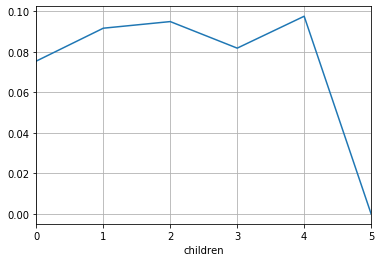

In [69]:
data.groupby('children')['debt'].mean().plot(grid = True)

### Вывод

С ростом количества детей показатель невозврата кредитов растет.   
Лучше всего возвращают кредиты бездетные заемщики. Это еще и самая большая группа.  
У заемщиков с 5-ю детьми уровень невозврата равен нулю, однако их группа довольно малочисленна по сравнению с другими группами.  
Исключение составляют заемщики с 3-мя детьми. В их группе показатель невозврата кредитов в срок уменьшается.  
Хуже всех возвращают кредиты клиенты с 4-мя детьми.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [70]:
data.groupby('family_status')['debt'].agg(['count', 'mean']).sort_values(by = 'mean', ascending=False)

,count,mean
family_status,,
не женат / не замужем,2810,0.097509
гражданский брак,4151,0.093471
женат / замужем,12339,0.075452
в разводе,1195,0.071130
вдовец / вдова,959,0.065693


### Вывод

Самые дисциплинированные заемщики в группе "вдовец/вдова".  
Больше всего невозвратов у группы "не женат/не замужем".  
Обе группы являются несемейными.  
Семейные заемщики находятся на среднем уровне невозврата кредитов по сравнению с остальными группами.   
Если рассматривать зависимость риска невозврата кредитов применительно к используемой нами категоризации - зависимость есть.   
Показатель невозврата кредитов находится в обратной зависимости от стажа семейной жизни.  
Чем меньше у заемщика опыт семейных отношений, тем выше риск невозврата им кредита.  
И наоборот, чем больше заемщик прожил в браке, тем он дисциплинированнее в финансовых вопросах.

In [71]:
data.groupby('total_income')['debt'].agg(['count', 'mean'])

,count,mean
total_income,,
20667,1,1.0
21205,1,0.0
21367,1,0.0
21695,1,0.0
21895,1,0.0
...,...,...
1711309,1,0.0
1715018,1,0.0
1726276,1,0.0


Рассмотрим зависимость риска невозврата кредита для заемщиков с разными уровнями доходов

In [72]:
data['income_groupe'] = pd.cut(data['total_income'], [0, 123000, 177000, 2300000])
data.pivot_table(index = 'income_groupe', values = 'debt', aggfunc = ['count', 'mean'])

,count,mean
,debt,debt
income_groupe,,
"(0, 123000]",7170,0.081172
"(123000, 177000]",7138,0.088680
"(177000, 2300000]",7146,0.073608


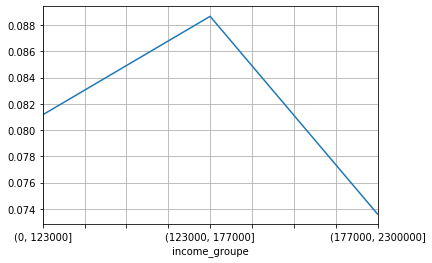

In [73]:
data.groupby('income_groupe')['debt'].mean().plot(grid = True)

В группе заемщиков со средним доходом самый высокий показатель невозврата кредитов

### Вывод

Самый высокий риск невозврата кредита в группе заемщиков со средним доходом от 123000 до 177000. В данной группе наблюдается к тому же минимальный разброс в доходах участников.    
У заемщиков с низким уровнем дохода риск невозврата кредита ниже.  
Однако самый низкий показатель невозврата кредита у заемщиков с высоким доходом.  
При росте уровня дохода выше среднего у заемщика повышается его надежность. Чем больше получает дохода заемщик по сравнению со средним доходом, тем риск невозврата кредита снижается.  

- Как разные цели кредита влияют на его возврат в срок?

In [74]:
data.pivot_table(index = 'total_purpose', values = 'debt', aggfunc = ['count', 'mean']).sort_values(by = ('mean', 'debt'), ascending=False)


,count,mean
,debt,debt
total_purpose,,
автомобиль,4306,0.093590
образование,4013,0.092200
свадьба,2324,0.080034
недвижимость,10811,0.072334


### Вывод

Ипотечное кредитование, самая многочисленная группа, в лидерах по возврату кредита в срок.  
Молодожены, самая малочисленная группа, тоже относительно дисциплинированные заемщики.   
Кредиты на покупку автомобиля и кредиты на получение образования возвращают реже всего.

### Шаг 4. Общий вывод



Для исследования надежности заемщиков нами была изучена таблица с данными по 21525 потенциальным заемщикам.  


Для проведения достоверного анализа была проведена предобработка данных:  
   * определены и заполнены пропущенные значения в столбцах 'days_employed' и 'total_income'  
   * в столбцах 'days_employed' и 'total_income' заменен вещественный тип данных на целочисленный  
   * в столбце 'dob_years' избавились от нулевых значений  
   * устранены ошибки в данных столбцов 'children' и 'gender'  
   * избавились от дубликатов в столбцах 'education', 'days_employed' и 'total_income'  
   * лемматизировали данные в столбце 'purpose'  
   * категоризировали данные.


В результате анализа были выделены четыре основные цели кредитования:  
   * недвижимость  
   * автомобиль  
   * образование  
   * свадьба.    


Больше всего запросов от потенциальных заемщиков поступает на кредитование операций с недвижимостью, менее всего - на свадьбу.    


Был проведен анализ надежности заемщиков по различным категориям:  
   * в зависимости от количества детей у заемщиков  
   * в зависимости от семейного положения заемщиков  
   * в зависимости от уровна доходов заемщиков.  
   

#### При анализе зависимости между наличием детей у заемщика и возвратом кредита в срок обнаружено, что с ростом количества детей у заемщика показатель невозврата кредитов растет.  
Лучше всего возвращают кредиты бездетные заемщики. Процент невозврата ими кредитов составляет 7,5%. Бездетные заемщики - самая многочисленная группа, она насчитывает 14091 человек.  
У заемщиков с 5-ю детьми уровень невозврата равен нулю, однако их группа довольно малочисленна по сравнению с другими группами.  
Хуже всех возвращают кредиты заемщики с 4-мя детьми. Процент невозврата кредитов в их группе равен почти 10%.  


#### При анализе зависимости между семейным положением заемщика и возвратом кредита в срок обнаружено, что показатель надежности заемщика находится в прямой зависимости от величины стажа его семейной жизни.  
Самые дисциплинированные заемщики имеют статус "вдовец/вдова". Это самая малочисленная группа, 959 человек. Процент невозврата  кредитов составляет 6,5%.
Больше всего невозвратов у заемщиков с семейным положением "не женат/не замужем". Эта группа самая многочисленная, 2810 человек. Процент невозврата кредитов в группе почти 10%.    
Семейные заемщики находятся на среднем уровне невозврата кредитов по сравнению с остальными группами.


Чем меньше у заемщика опыт семейных отношений, тем выше риск невозврата им кредита.
И наоборот, чем больше заемщик прожил в браке, тем он дисциплинированнее в финансовых вопросах.  

#### При анализе зависимости между уровнем дохода заемщика и возвратом кредита в срок обнаружено, что самый высокий риск невозврата кредита наблюдается в группе заемщиков со средним доходом от 123000 до 177000. Процент невозврата кредитов в группе почти 9%.      
У заемщиков с низким уровнем дохода риск невозврата кредита ниже.  
Однако самый низкий показатель невозврата кредита у заемщиков с высоким доходом. Процент невозврата кредитов в группе почти 7,5%.  
При росте дохода заемщика, начиная с 177000, повышается его надежность.  

#### При анализе зависимости между разными целями кредита и его возвратом в срок обнаружено, что  
   * Ипотечное кредитование, самая многочисленная группа (10811 кредитов), в лидерах по возврату кредита в срок. Процент невозврата  кредитов на операци с недвижимостью составляет 7,2%.  
   * Кредиты на свадьбу составляют самую малочисленную группу (2324 кредита). Процент невозврата таких кредитов составляет 8%.  
   * Кредиты на покупку автомобиля и кредиты на получение образования самые высокорисковые. Процент невозврата таких кредитов составляет 9,4% и 9,2% соответственно.   
   
   
Таким образом мы выяснили, что и семейное положение, и наличие детей, и доход заемщика, а также сама цель кредита оказывают влияние на факт погашения кредита в срок.  

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.